In [1]:
pip install sysidentpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 3.7 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Final Dataset.xlsx to Final Dataset.xlsx


In [3]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install numpy pandas matplotlib statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [14]:
%matplotlib inline
var=pd.read_excel('Final Dataset.xlsx', sheet_name='Model_Dataset', skiprows=[0, 2])
var.dropna(inplace=True)
var.head()

,Date,BNB-USD,BTC-USD,ETH-USD,USDT-USD,XRP-USD,ADA-USD,BITG-USD,MIOTA-USD,XNO-USD,POWR-USD,Power,Ground Transport,Residential,Domestic Aviation,International Aviation
0,2019-01-03,-0.283723,-0.146478,-0.218059,-0.242175,-0.213296,-0.133797,0.272976,-0.350994,-0.212519,-0.541858,0.017161,0.100704,-0.013013,0.037922,0.026545
1,2019-01-04,0.250258,0.067790,0.155431,0.110796,0.026443,-0.276461,-0.199125,0.001564,0.155184,-0.798119,0.015954,0.002050,-0.008488,-0.013425,0.013110
2,2019-01-05,0.034520,0.058029,0.065619,0.024849,0.003227,0.448817,-1.063302,-0.364719,0.394051,0.533827,-0.031367,-0.072048,-0.042761,-0.084376,0.028308
3,2019-01-06,0.314991,0.085648,-0.032553,0.056192,0.085732,0.716078,-0.655398,0.427898,0.268170,1.404755,-0.020110,-0.145075,-0.015340,0.001235,0.016680
4,2019-01-07,-0.092145,-0.068087,-0.175156,-0.115993,0.013049,-0.117139,0.675955,-0.436056,-0.465483,-1.400369,0.045889,0.199612,0.012749,0.042424,-0.069635


In [15]:
input_var=var.iloc[:, 1:11]


In [16]:
input_var

,BNB-USD,BTC-USD,ETH-USD,USDT-USD,XRP-USD,ADA-USD,BITG-USD,MIOTA-USD,XNO-USD,POWR-USD
0,-0.283723,-0.146478,-0.218059,-0.242175,-0.213296,-0.133797,0.272976,-0.350994,-0.212519,-0.541858
1,0.250258,0.067790,0.155431,0.110796,0.026443,-0.276461,-0.199125,0.001564,0.155184,-0.798119
2,0.034520,0.058029,0.065619,0.024849,0.003227,0.448817,-1.063302,-0.364719,0.394051,0.533827
3,0.314991,0.085648,-0.032553,0.056192,0.085732,0.716078,-0.655398,0.427898,0.268170,1.404755
4,-0.092145,-0.068087,-0.175156,-0.115993,0.013049,-0.117139,0.675955,-0.436056,-0.465483,-1.400369
...,...,...,...,...,...,...,...,...,...,...
1544,0.592408,0.270480,0.205579,0.309876,0.917758,0.317827,-0.029414,0.272392,0.560871,0.921466
1545,-0.317109,-0.022535,-0.028215,-0.067618,0.147194,0.055900,0.014815,-0.232628,-0.269928,-0.013474
1546,0.009600,0.151129,0.090353,0.160200,0.257675,0.390388,1.317827,0.260564,-0.389168,0.364504
1547,0.207287,0.081232,0.062406,0.086196,-0.417987,-0.188504,-0.472632,-0.222510,-0.139464,1.178460


In [17]:
output_var=var.iloc[:, 11]

In [18]:
var.isna()

,Date,BNB-USD,BTC-USD,ETH-USD,USDT-USD,XRP-USD,ADA-USD,BITG-USD,MIOTA-USD,XNO-USD,POWR-USD,Power,Ground Transport,Residential,Domestic Aviation,International Aviation
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
var=var.drop(columns=["Ground Transport", "Residential", "Domestic Aviation", "International Aviation"])

In [20]:
var.isnull().sum()

Date         0
BNB-USD      0
BTC-USD      0
ETH-USD      0
USDT-USD     0
XRP-USD      0
ADA-USD      0
BITG-USD     0
MIOTA-USD    0
XNO-USD      0
POWR-USD     0
Power        0
dtype: int64

In [21]:
var.tail()

,Date,BNB-USD,BTC-USD,ETH-USD,USDT-USD,XRP-USD,ADA-USD,BITG-USD,MIOTA-USD,XNO-USD,POWR-USD,Power
1544,2023-03-27,0.592408,0.270480,0.205579,0.309876,0.917758,0.317827,-0.029414,0.272392,0.560871,0.921466,0.037557
1545,2023-03-28,-0.317109,-0.022535,-0.028215,-0.067618,0.147194,0.055900,0.014815,-0.232628,-0.269928,-0.013474,0.031142
1546,2023-03-29,0.009600,0.151129,0.090353,0.160200,0.257675,0.390388,1.317827,0.260564,-0.389168,0.364504,-0.016223
1547,2023-03-30,0.207287,0.081232,0.062406,0.086196,-0.417987,-0.188504,-0.472632,-0.222510,-0.139464,1.178460,-0.022966
1548,2023-03-31,-0.348287,-0.166129,-0.060962,-0.158669,-0.331557,0.488918,0.016702,0.036075,-0.113315,-0.481533,-0.020821


<Axes: >

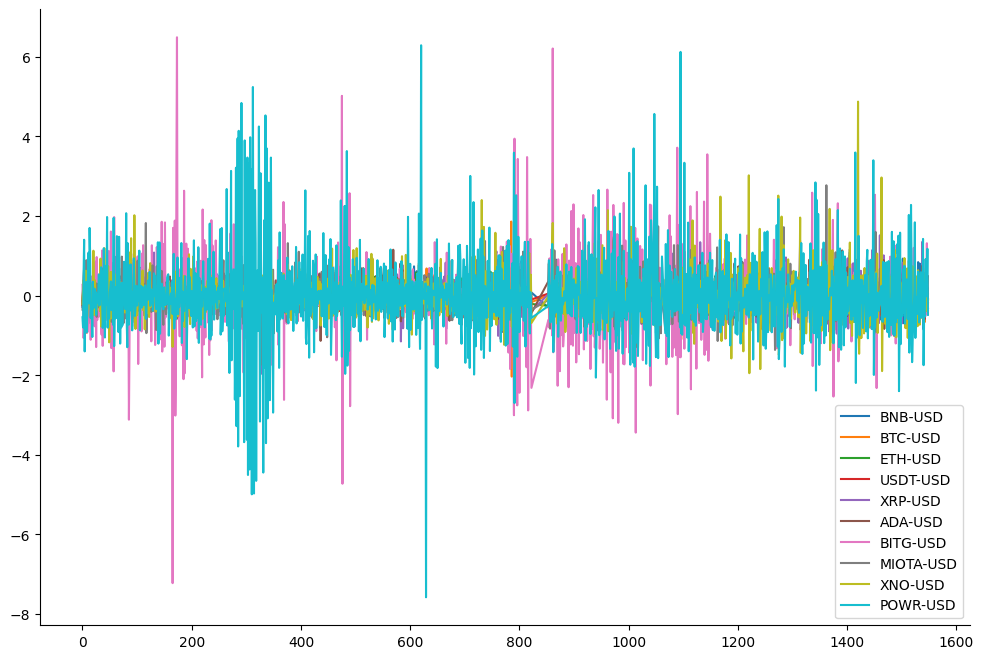

In [22]:
input_var[0:1550].plot(figsize=(12, 8))


<Axes: >

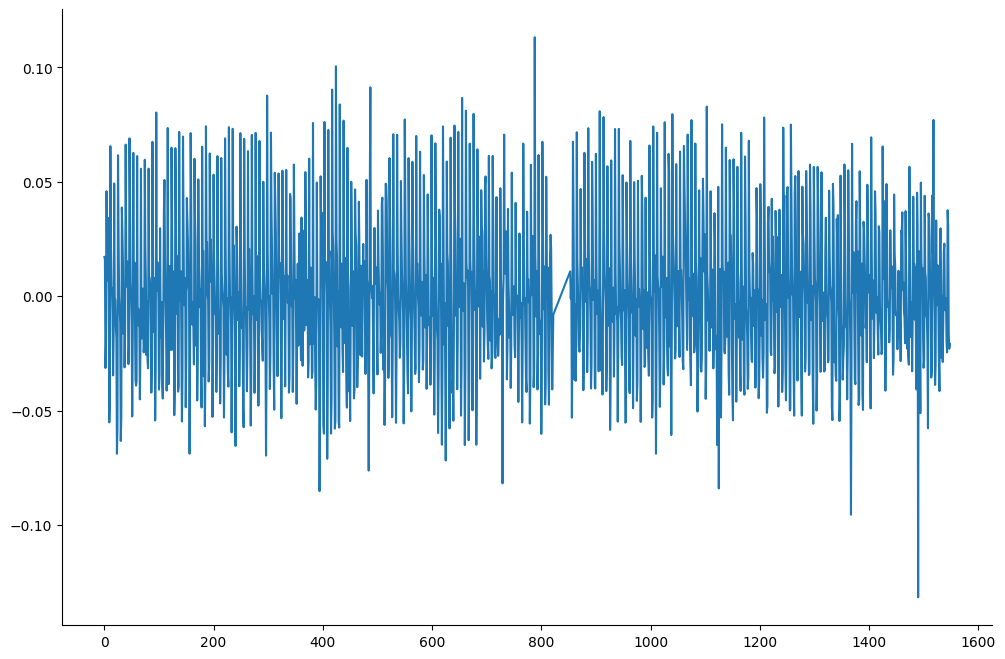

In [23]:
output_var[0:1550].plot(figsize=(12, 8))


<Axes: >

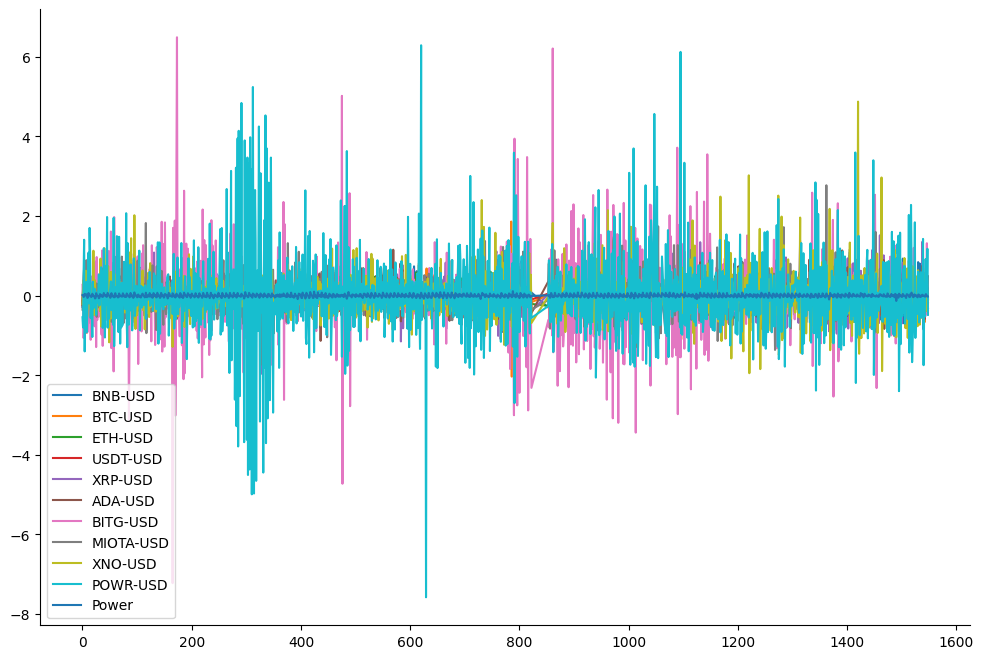

In [25]:
var[['BNB-USD', 'BTC-USD', 'ETH-USD', 'USDT-USD', 'XRP-USD', 'ADA-USD', 'BITG-USD', 'MIOTA-USD', 'XNO-USD', 'POWR-USD', 'Power']][0:1550].plot(figsize=(12, 8))


In [26]:
df=pd.DataFrame(input_var)
x = df.to_numpy()
df1=pd.DataFrame(output_var)
S= df1.to_numpy()

In [27]:
x_train, x_valid, y_train, y_valid = train_test_split(x,S,train_size=0.85,shuffle= False)


In [28]:
df

,BNB-USD,BTC-USD,ETH-USD,USDT-USD,XRP-USD,ADA-USD,BITG-USD,MIOTA-USD,XNO-USD,POWR-USD
0,-0.283723,-0.146478,-0.218059,-0.242175,-0.213296,-0.133797,0.272976,-0.350994,-0.212519,-0.541858
1,0.250258,0.067790,0.155431,0.110796,0.026443,-0.276461,-0.199125,0.001564,0.155184,-0.798119
2,0.034520,0.058029,0.065619,0.024849,0.003227,0.448817,-1.063302,-0.364719,0.394051,0.533827
3,0.314991,0.085648,-0.032553,0.056192,0.085732,0.716078,-0.655398,0.427898,0.268170,1.404755
4,-0.092145,-0.068087,-0.175156,-0.115993,0.013049,-0.117139,0.675955,-0.436056,-0.465483,-1.400369
...,...,...,...,...,...,...,...,...,...,...
1544,0.592408,0.270480,0.205579,0.309876,0.917758,0.317827,-0.029414,0.272392,0.560871,0.921466
1545,-0.317109,-0.022535,-0.028215,-0.067618,0.147194,0.055900,0.014815,-0.232628,-0.269928,-0.013474
1546,0.009600,0.151129,0.090353,0.160200,0.257675,0.390388,1.317827,0.260564,-0.389168,0.364504
1547,0.207287,0.081232,0.062406,0.086196,-0.417987,-0.188504,-0.472632,-0.222510,-0.139464,1.178460


In [29]:
df1

,Power
0,0.017161
1,0.015954
2,-0.031367
3,-0.020110
4,0.045889
...,...
1544,0.037557
1545,0.031142
1546,-0.016223
1547,-0.022966


In [30]:
len(x_valid)

227

In [31]:
len(y_valid)
# len(y_train)

227

In [32]:
len(x_train)

1283

In [33]:
len(y_train)

1283

In [ ]:
# # Concatenate input features and target variable for the validation set
# valid_data = np.column_stack((x_valid, y_valid))

In [35]:
basis_function = Polynomial(degree=3)

model = FROLS(
    order_selection=True,
    n_terms=50,
    extended_least_squares=False,
    ylag=15,
    xlag=[15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
    info_criteria='bic',
    estimator='least_squares',
    basis_function=basis_function
)

In [36]:
model.fit(X=x_train, y=y_train)

In [38]:
yhat = model.predict(X=x_valid, y=y_valid, steps_ahead=1)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)

0.7155749265459597
         Regressors   Parameters             ERR
0            y(k-7)   5.3228E-01  6.53715182E-01
1           y(k-14)   3.5723E-01  4.35445089E-02
2    x1(k-12)y(k-8)  -1.1332E+02  9.80795295E-03
3   x5(k-11)y(k-12)  -2.7911E+01  6.67967351E-03
4    x6(k-11)y(k-2)   6.6898E+01  5.45133385E-03
5            y(k-2)  -3.0733E-01  9.02881632E-03
6            y(k-4)  -1.4578E-01  7.37555714E-03
7     x5(k-2)y(k-9)  -3.7369E+01  5.16542073E-03
8          x3(k-13)   4.7903E+00  6.54728445E-03
9     x5(k-6)y(k-1)  -1.0146E+00  6.63796531E-03
10          x2(k-2)  -1.5220E+00  5.06765270E-03
11   x2(k-9)y(k-12)  -6.4013E+01  5.69039661E-03
12   x9(k-7)x1(k-5)   1.2500E-02  2.91866825E-03
13    y(k-12)y(k-6)  -5.2334E+01  2.53489691E-03
14   x5(k-4)x1(k-1)  -5.3076E+01  2.39285452E-03
15   x6(k-1)x1(k-3)   1.0169E-01  2.16446759E-03
16   x3(k-8)y(k-11)   5.3234E+01  2.19205129E-03
17   x9(k-13)y(k-5)   3.3060E-01  1.93007952E-03
18   x3(k-12)y(k-8)   6.2926E+00  2.23250071E-03
1

In [39]:
r["ERR"] = pd.to_numeric(r["ERR"], downcast="float")

print('Sum of ERR=  ',r['ERR'].sum())

Sum of ERR=   0.8198828


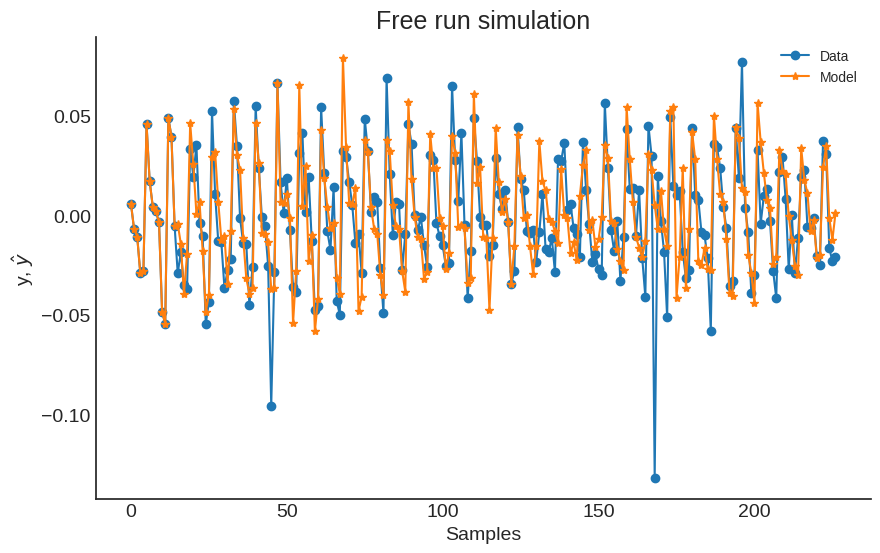

In [40]:
plot_results(y=y_valid, yhat = yhat, n=1000)
# ee = compute_residues_autocorrelation(y_valid, yhat)
# plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
# x1e = compute_cross_correlation(y_valid, yhat, x_valid)
# plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

In [41]:
t2 = var['Date'][1283:1520]

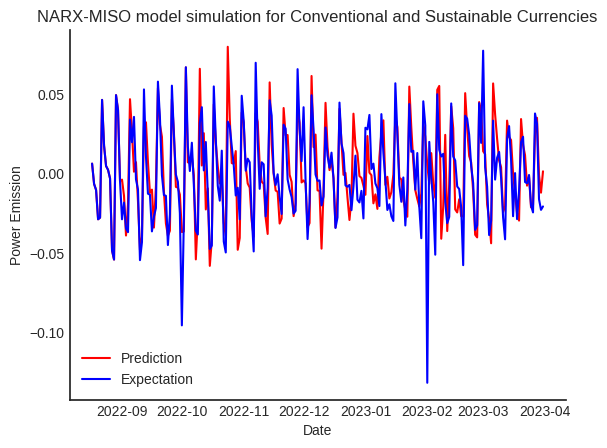

In [43]:
plt.plot(t2, yhat, label = "Prediction", color='red')

# plotting the line 2 points
plt.plot(t2, y_valid, label = "Expectation", color='blue')
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('Power Emission')
# Set a title of the current axes.
plt.title('NARX-MISO model simulation for Conventional and Sustainable Currencies')
# show a legend on the plot
plt.legend()
plt.savefig('MISO_fw.png')

In [44]:
len(yhat)

227

In [45]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(yhat, S[1283:1520])

rmse(yhat, y_valid)

0.019850587214270684

In [46]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(S[1283:1520], yhat, squared=False)
rms

0.019850587214270684

In [47]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_valid, yhat)
mae

0.013513516927691035

In [48]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_valid, yhat)
mape

1.750885811784499

In [49]:
from numpy import savetxt
savetxt('yhat.csv', yhat, delimiter=',')
r.to_csv('Model_Structure.csv')
df_1 = pd.DataFrame(S[1283:1520], columns=['Expectation-O/P'])
df_1

,Expectation-O/P
0,0.006073
1,-0.006707
2,-0.010456
3,-0.028897
4,-0.027849
...,...
222,0.037557
223,0.031142
224,-0.016223
225,-0.022966


In [50]:
df_1['Prediction-O/P'] = yhat
df_1

,Expectation-O/P,Prediction-O/P
0,0.006073,0.006073
1,-0.006707,-0.006707
2,-0.010456,-0.010456
3,-0.028897,-0.028897
4,-0.027849,-0.027849
...,...,...
222,0.037557,0.024282
223,0.031142,0.034833
224,-0.016223,-0.001028
225,-0.022966,-0.012169


In [51]:
len(df_1)
df_1.columns

Index(['Expectation-O/P', 'Prediction-O/P'], dtype='object')

In [52]:
import plotly.express as px
import pandas as pd
import numpy as np

# data
fig = px.line(df_1, x=var ['Date'][1283:1520], y= df_1.columns[0:2],labels=dict(value="Power Emission"),title="NARX-MISO model simulation for Conventional and Sustainable Currencies")

# Show plot
fig.show()

In [53]:
import plotly.graph_objects as go

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x= var['Date'][1283:1520], y=df_1["Expectation-O/P"], name="Expectation", mode="lines"))
fig2.add_trace(go.Scatter(x= var['Date'][1283:1520], y=df_1["Prediction-O/P"], name="Prediction", mode="lines"))
fig2.update_layout(
    title="NARX-MISO model simulation for Conventional and Sustainable Currencies", xaxis_title="Year", yaxis_title="Power Emission"
)
fig2.show()